In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm 
from sklearn import metrics
from sklearn import linear_model
from joblib import dump, load

In [32]:
def read_csv():
    path = '/home/juan/Desktop/TESIS/Codes/newCodes/Datasets/RandomEvents-TrainingData/TrainingData_ThreeClass.csv'
    Y =  pd.read_csv(path,usecols=['Label'])

    complete_dataset = pd.read_csv(path, usecols=["Valor (%)","Valor (hPa)","Valor (W/m2)","Valor (°C)","Valor (m/s)"])

    datasetPCA = pd.read_csv(path, usecols= ["Valor (%)","Valor (W/m2)", "Valor (°C)",])
    
    datasetRR = pd.read_csv(path, usecols= ["Valor (hPa)", "Valor (°C)","Valor (m/s)"])

    datasetPCA_RR = pd.read_csv(path, usecols= ["Valor (%)","Valor (hPa)", "Valor (°C)",])


    print("complete_dataset\n",complete_dataset)
    print("datasetPCA\n",datasetPCA)
    print("datasetRR\n",datasetRR)    
    print("datasetPCA_RR\n",datasetPCA_RR)

    print("Y\n",Y.sample(n=10))


    #return(complete_dataset,reduced_datasetPCA1,reduced_datasetPCA2,reduced_datasetRelief1,reduced_datasetRelief2,reduced_dataset_PCA_Relief,Y)
    return(complete_dataset,datasetPCA,datasetRR,datasetPCA_RR,Y)


In [33]:
def standarize(Dataset):
    # z= (x - u) / s
    # where u=mean, s= stand deviatoin

    #cols names
    names = Dataset.columns   

    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    
    # Fit your data on the scaler object
    scaled_Dataset = scaler.fit_transform(Dataset)
    scaled_Dataset = pd.DataFrame(scaled_Dataset, columns=names)    

    return(scaled_Dataset)


In [34]:
def trainSVM(X,Y,name,scoreDataset):

    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(Y), test_size = 0.25)

        #make_svv
        clf =  svm.SVC(kernel='rbf',C=100.0, gamma=1, max_iter=-1,class_weight='balanced')

        # Train classifier 
        clf.fit(X_train, y_train)               

        # Mean accuracy of self.predict(X) wrt. y.            
        accu=np.round(clf.score(X_test, y_test) *100,decimals=3)      

        #if accu>87:
            #print("Accuracy=",accu,"%")
            #s=input("save?")
            #if s =='y':
            #  filename = 'SVM_'+name+'.joblib'
            #  dump(clf, filename)        

        scoreDataset.append(accu)   
        




In [35]:
def graph_bp(scores):    
    scores_frame = pd.DataFrame.from_dict(scores)
    boxplot = scores_frame.boxplot(grid=True, rot=45, fontsize=15)
    boxplot.set_ylabel("Accuracy")
    plt.savefig('BoxPlot_three_classSVM.eps',bbox_inches='tight')    
    plt.show()

complete_dataset
      Valor (%)  Valor (hPa)  Valor (W/m2)  Valor (°C)  Valor (m/s)
0         51.0        663.9         676.0        15.8          1.0
1         97.0        664.8           0.0         7.4          1.5
2         86.0        667.6         597.0        10.6          1.6
3         43.0        666.2        1016.0        13.5          5.0
4         59.0        666.0         704.0        11.4          7.4
..         ...          ...           ...         ...          ...
476       98.0        683.8          23.0        10.2          1.3
477       98.0        683.8          17.0        10.1          1.0
478       98.0        683.9          13.0        10.0          0.4
479       98.0        683.9          15.0         9.6          1.2
480       98.0        683.8          10.0         9.4          1.9

[481 rows x 5 columns]
datasetPCA
      Valor (%)  Valor (W/m2)  Valor (°C)
0         51.0         676.0        15.8
1         97.0           0.0         7.4
2         86.0     

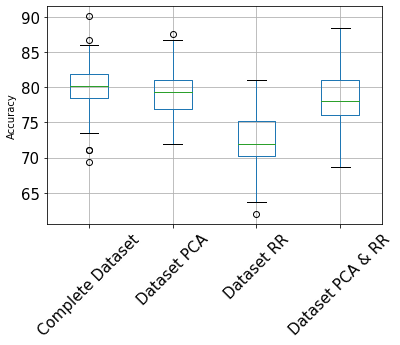

Mean accuracy of Complete Dataset after 100 repetitions is 79.983
Mean accuracy of Dataset PCA after 100 repetitions is 79.066
Mean accuracy of Dataset RR after 100 repetitions is 72.298
Mean accuracy of Dataset PCA & RR after 100 repetitions is 78.149


In [36]:
def main():
    complete_dataset,datasetPCA,datasetRR,datasetPCA_RR,Y = read_csv()
    scores= {'Complete Dataset':[],'Dataset PCA':[],'Dataset RR':[],'Dataset PCA & RR':[]}

    DataSets = [complete_dataset,datasetPCA,datasetRR,datasetPCA_RR]
    dataset=['Complete Dataset','Dataset PCA','Dataset RR','Dataset PCA & RR']
    i=0

    for X in DataSets:
        print("\n\nStandanrized Dataset",dataset[i])
        scaled_X = standarize(X)
        trainSVM(scaled_X,Y,dataset[i],scores[dataset[i]])
        
        i=i+1

    graph_bp(scores)
    for dataset in scores:
      print("Mean accuracy of",dataset,"after 100 repetitions is",np.round(np.mean(scores[dataset]),decimals=3))

main()